In [10]:
import pandas as pd
import numpy as np
import math
import csv
import scipy
import datetime
asset = "A"
data = pd.DataFrame(columns=['high','low','PDC','current','TR','Unit'])
data['PDC'] = pd.read_csv(r'Data/pre_cp_adj_fake.csv')['asset']
data['high'] = pd.read_csv(r'Data/high_adj_fake.csv')[asset]
data['low'] = pd.read_csv(r'Data/low_adj_fake.csv')[asset]
data['current'] = pd.read_csv(r'Data/cp_adj_fake.csv')[asset]
data['Unit'] = 0

In [28]:
for i in range(len(data)):
    data.loc[i,'TR']=max(data.iloc[i]['high']-data.iloc[i]['low'],abs(data.iloc[i]['high']-data.iloc[i]['PDC']),abs(data.iloc[i]['PDC']-data.iloc[i]['low']))
data

,high,low,PDC,current,TR,Unit,Up,Down,ATR
0,4610.000000,4590.000000,NaN,4590.000000,20.0,0,NaN,NaN,NaN
1,4590.000000,4590.000000,NaN,4590.000000,0.0,0,NaN,NaN,NaN
2,4600.000000,4590.000000,NaN,4600.000000,10.0,0,NaN,NaN,NaN
3,4600.000000,4600.000000,NaN,4600.000000,0.0,0,NaN,NaN,NaN
4,4652.337978,4606.449229,4600.000000,4638.668989,52.337978,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7773,4900.047039,4856.653672,4822.619659,4871.118128,77.42738,0,4940.887854,4769.866939,56.539004
7774,4946.843807,4874.521529,4871.118128,4928.125100,75.725679,0,4940.887854,4769.866939,57.006972
7775,4950.247208,4920.467447,4871.118128,4939.186154,79.129081,0,4946.843807,4769.866939,59.814778
7776,4941.738705,4889.836835,4871.118128,4897.494488,70.620577,0,4950.247208,4801.348401,59.729693


In [29]:
N = 20
k = 10
data['Up'] = data['high'].rolling(k).max()
data['Down'] = data['low'].rolling(k).min()
data['ATR'] = data['TR'].rolling(N).mean()
data['Up']=data['Up'].shift(axis=0,periods=1)
data['Down'] = data['Down'].shift(1)
data

,high,low,PDC,current,TR,Unit,Up,Down,ATR
0,4610.000000,4590.000000,NaN,4590.000000,20.0,0,NaN,NaN,NaN
1,4590.000000,4590.000000,NaN,4590.000000,0.0,0,NaN,NaN,NaN
2,4600.000000,4590.000000,NaN,4600.000000,10.0,0,NaN,NaN,NaN
3,4600.000000,4600.000000,NaN,4600.000000,0.0,0,NaN,NaN,NaN
4,4652.337978,4606.449229,4600.000000,4638.668989,52.337978,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7773,4900.047039,4856.653672,4822.619659,4871.118128,77.42738,0,4940.887854,4769.866939,56.539004
7774,4946.843807,4874.521529,4871.118128,4928.125100,75.725679,0,4940.887854,4769.866939,57.006972
7775,4950.247208,4920.467447,4871.118128,4939.186154,79.129081,0,4946.843807,4769.866939,59.814778
7776,4941.738705,4889.836835,4871.118128,4897.494488,70.620577,0,4950.247208,4801.348401,59.729693


In [30]:
data = data.dropna(axis=0).reset_index(drop=True)
data

,high,low,PDC,current,TR,Unit,Up,Down,ATR
0,4638.668989,4623.047287,4625.976356,4633.787207,15.621701,0,4641.598058,4606.449229,19.192632
1,4649.408909,4631.834494,4633.787207,4639.645345,17.574414,0,4641.598058,4617.189149,19.071353
2,4645.503483,4634.763563,4633.787207,4640.621701,11.716276,0,4649.408909,4621.094575,19.657167
3,4660.148828,4634.763563,4633.787207,4647.456196,26.361621,0,4649.408909,4622.070931,20.475248
4,4678.699599,4646.479840,4633.787207,4655.267047,44.912392,0,4660.148828,4622.070931,22.720868
...,...,...,...,...,...,...,...,...,...
7754,4900.047039,4856.653672,4822.619659,4871.118128,77.42738,0,4940.887854,4769.866939,56.539004
7755,4946.843807,4874.521529,4871.118128,4928.125100,75.725679,0,4940.887854,4769.866939,57.006972
7756,4950.247208,4920.467447,4871.118128,4939.186154,79.129081,0,4946.843807,4769.866939,59.814778
7757,4941.738705,4889.836835,4871.118128,4897.494488,70.620577,0,4950.247208,4801.348401,59.729693


In [35]:
prev_price = data['current'][0]
for i in range(len(data)):
    if i==0:
        if data['current'][i] > data['Up'][i]:
            prev_price = data['current'][i]
            data.loc[i,'Unit'] += 1
        else:
            if data['current'][i] < data['Down'][i]:
                prev_price = data['current'][i]
                data.loc[i,'Unit'] -= 1
    else:
        if data['Unit'][i-1] == 0:
            if data['current'][i] > data['Up'][i]:
                prev_price = data['current'][i]
                data.loc[i,'Unit'] = data['Unit'][i-1]+1
            else:
                if data['current'][i] < data['Down'][i]:
                    prev_price = data['current'][i]
                    data.loc[i,'Unit'] = data['Unit'][i-1] - 1

        if data['Unit'][i-1] > 0:
            if data['current'][i] > prev_price + 0.5*data['ATR'][i]:
                data.loc[i,'Unit'] = data['Unit'][i-1] + 1
                prev_price = data['current'][i]
            else:
                if data['current'][i] < prev_price - 2*data['ATR'][i]:
                    data.loc[i,'Unit'] = 0
                else:
                    if data['current'][i] < data['Down'][i]:
                        data.loc[i,'Unit'] = 0
        if data['Unit'][i-1] < 0:
            if data['current'][i] < prev_price - 0.5*data['ATR'][i]:
                data.loc[i,'Unit'] = data['Unit'][i-1] - 1
                prev_price = data['current'][i]
            else:
                if data['current'][i] > prev_price + 2*data['ATR'][i]:
                    data.loc[i,'Unit'] = 0
                else:
                    if data['current'][i] > data['Up'][i]:
                        data.loc[i,'Unit'] = 0
data


,high,low,PDC,current,TR,Unit,Up,Down,ATR,value
0,4638.668989,4623.047287,4625.976356,4633.787207,15.621701,0,4641.598058,4606.449229,19.192632,0.000000
1,4649.408909,4631.834494,4633.787207,4639.645345,17.574414,0,4641.598058,4617.189149,19.071353,0.000000
2,4645.503483,4634.763563,4633.787207,4640.621701,11.716276,0,4649.408909,4621.094575,19.657167,0.000000
3,4660.148828,4634.763563,4633.787207,4647.456196,26.361621,0,4649.408909,4622.070931,20.475248,0.000000
4,4678.699599,4646.479840,4633.787207,4655.267047,44.912392,0,4660.148828,4622.070931,22.720868,0.000000
...,...,...,...,...,...,...,...,...,...,...
7754,4900.047039,4856.653672,4822.619659,4871.118128,77.42738,0,4940.887854,4769.866939,56.539004,-83361.739924
7755,4946.843807,4874.521529,4871.118128,4928.125100,75.725679,0,4940.887854,4769.866939,57.006972,-83361.739924
7756,4950.247208,4920.467447,4871.118128,4939.186154,79.129081,0,4946.843807,4769.866939,59.814778,-83361.739924
7757,4941.738705,4889.836835,4871.118128,4897.494488,70.620577,0,4950.247208,4801.348401,59.729693,-83361.739924


In [36]:
data['value'] = data['Unit']*data['current']
data['value'] = data['value'].cumsum()
data

,high,low,PDC,current,TR,Unit,Up,Down,ATR,value
0,4638.668989,4623.047287,4625.976356,4633.787207,15.621701,0,4641.598058,4606.449229,19.192632,0.000000
1,4649.408909,4631.834494,4633.787207,4639.645345,17.574414,0,4641.598058,4617.189149,19.071353,0.000000
2,4645.503483,4634.763563,4633.787207,4640.621701,11.716276,0,4649.408909,4621.094575,19.657167,0.000000
3,4660.148828,4634.763563,4633.787207,4647.456196,26.361621,0,4649.408909,4622.070931,20.475248,0.000000
4,4678.699599,4646.479840,4633.787207,4655.267047,44.912392,0,4660.148828,4622.070931,22.720868,0.000000
...,...,...,...,...,...,...,...,...,...,...
7754,4900.047039,4856.653672,4822.619659,4871.118128,77.42738,0,4940.887854,4769.866939,56.539004,-83361.739924
7755,4946.843807,4874.521529,4871.118128,4928.125100,75.725679,0,4940.887854,4769.866939,57.006972,-83361.739924
7756,4950.247208,4920.467447,4871.118128,4939.186154,79.129081,0,4946.843807,4769.866939,59.814778,-83361.739924
7757,4941.738705,4889.836835,4871.118128,4897.494488,70.620577,0,4950.247208,4801.348401,59.729693,-83361.739924


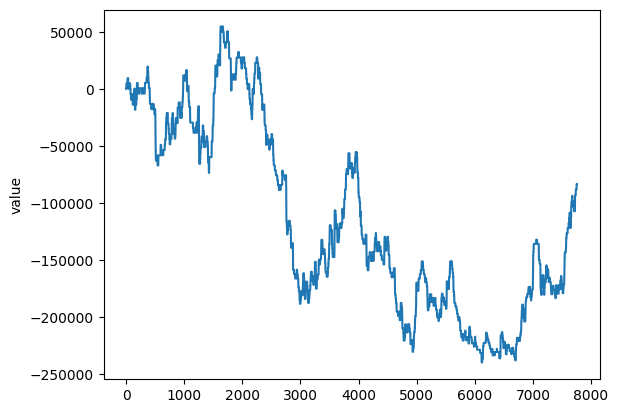

In [38]:
import matplotlib.pyplot as plt
plt.plot(data['value'])
plt.ylabel('value')
plt.show()